In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv(r"C:\Users\ANUBHAV\OneDrive\Apps\Cardiovascular_Risk_Assessment_Using_Statistical_Analysis_and_ML\data\processed\cleaned_featured_data.csv")
model = joblib.load(r"C:\Users\ANUBHAV\OneDrive\Apps\Cardiovascular_Risk_Assessment_Using_Statistical_Analysis_and_ML\models\logistic_regression.pkl")

In [3]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

In [4]:
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:,1]

In [5]:
print(classification_report(y, y_pred))
print("ROC-AUC:", roc_auc_score(y, y_prob))

              precision    recall  f1-score   support

         0.0       0.92      0.67      0.77      3596
         1.0       0.27      0.68      0.38       644

    accuracy                           0.67      4240
   macro avg       0.59      0.67      0.58      4240
weighted avg       0.82      0.67      0.71      4240

ROC-AUC: 0.7335721540151583


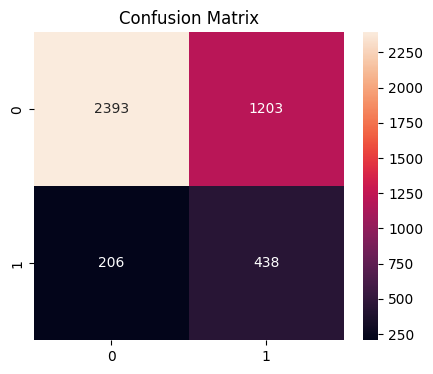

In [6]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [7]:
# Logistic Regression Coefficients
coef = model.named_steps["model"].coef_[0]

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coef
}).sort_values(by="Coefficient", ascending=False)

coef_df.head(10)

,Feature,Coefficient
1,age,1.113935
9,totChol,0.527323
10,sysBP,0.277103
4,cigsPerDay,0.261017
0,male,0.188994
14,glucose,0.129528
5,BPMeds,0.091631
6,prevalentStroke,0.088043
7,prevalentHyp,0.067242
16,age_group_Middle,0.064038
